In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.6 MB/s eta 0:00:00


In [3]:
import os
import pydicom
import matplotlib.pyplot as plt
import numpy as np


In [4]:
path_roi = "/content/drive/MyDrive/Colab Notebooks/Pulmonary Fibrosis/term2/HUG-data/ILD_DB_lungMasks/"

In [5]:
directories = os.listdir(path_roi)
remove_elements = ['HRCT_pilot','171','172','173','174','175','177','179','182','183','184','185']
for i in remove_elements:
  directories.remove(i)


In [6]:
labels = ['ground_glass','fibrosis','micronodules','consolidation','healthy', 'emphysema','reticulation' ]

In [ ]:
for i in labels:
  if not os.path.exists("/content/drive/MyDrive/Colab Notebooks/Pulmonary Fibrosis/term2/mask_data/" + i)
    os.makedirs("/content/drive/MyDrive/Colab Notebooks/Pulmonary Fibrosis/term2/mask_data/" + i)

In [8]:
def show_dcom_file(path):
  ds = pydicom.dcmread(path)
  pixel_data = ds.pixel_array

  plt.imshow(pixel_data, cmap=plt.cm.gray)
  plt.show()

In [31]:
from PIL import Image
import cv2

In [69]:
def apply_mask_to_dicom(image_path, mask_path, output_path):
    # Load DICOM image and mask
    dicom_image = pydicom.dcmread(image_path)
    dicom_mask = pydicom.dcmread(mask_path)

    # Convert DICOM image and mask to numpy arrays
    image_array = dicom_image.pixel_array
    mask_array = dicom_mask.pixel_array

    # Apply mask operation to the image
    # masked_image_array = np.bitwise_and(image_array, mask_array)
    masked_image_array = cv2.bitwise_and(image_array, image_array, mask=mask_array)

    # Create a new DICOM object with the same metadata as the original image
    masked_dicom_image = pydicom.dcmread(image_path)
    masked_dicom_image.PixelData = masked_image_array.tobytes()

    # # Display the masked image
    # plt.imshow(masked_image_array, cmap='gray')

    # plt.show()

    # Save the modified DICOM image
    masked_dicom_image.save_as(output_path)


In [97]:
def converter(name):
  if len(name.split("-")) == 5:
      patient_id, x , code , slice_number , y = name.split("-")

      path_img = name
      path_mask = patient_id + "/" + "lung_mask" +"/" + "lung_mask" + f"_{str(int(code))}_{str(int(slice_number))}.dcm"
      path_target = name

  else :
        patient_id, x , a, b, c , code , slice_number , y = name.split("-")
        path_img = name
        path_mask = patient_id + "/" + f"{x}-{a}-{b}" + "/" + "lung_mask" +"/" + "lung_mask" + f"_{str(int(code))}_{str(int(slice_number))}.dcm"
        path_target =  name
  return path_img, path_mask, path_target

In [ ]:
label_path = "/content/drive/MyDrive/Colab Notebooks/Pulmonary Fibrosis/term2/data/"
mask_path =  "/content/drive/MyDrive/Colab Notebooks/Pulmonary Fibrosis/term2/HUG-data/ILD_DB_lungMasks/"
target_path = "/content/drive/MyDrive/Colab Notebooks/Pulmonary Fibrosis/term2/mask_data/"

for label in labels:
  inner_label_path = label_path + label + "/"
  print(label)
  for dcom in os.listdir(inner_label_path):
    print("----->  " + dcom)
    path_img , path_mask, path_target = converter(dcom)

    if not os.path.exists(target_path + label):
      os.makedirs(target_path + label)


    # apply_mask_to_dicom(path_img , path_mask, path_target)


In [81]:
converter("181-CT-3207-0012-0.dcm")

('181-CT-3207-0012-0.dcm',
 '181/lung_mask/lung_mask_3207_12.dcm',
 'reticulation/181-CT-3207-0012-0.dcm')

In [103]:
def plot_dicom_subplots(dcm_paths):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    names = ["Image","Mask","Mask_Image"]
    for i, dcm_path in enumerate(dcm_paths):
        # Load DICOM file
        dicom_image = pydicom.dcmread(dcm_path)

        # Extract pixel data
        image_array = dicom_image.pixel_array

        # Plot DICOM image
        axs[i].imshow(image_array, cmap='gray')
        # axs[i].axis('off')
        axs[i].set_title(f"{names[i]}")

    plt.tight_layout()
    plt.show()


In [87]:
import random

ground_glass
112-CT-0916-0004-0.dcm


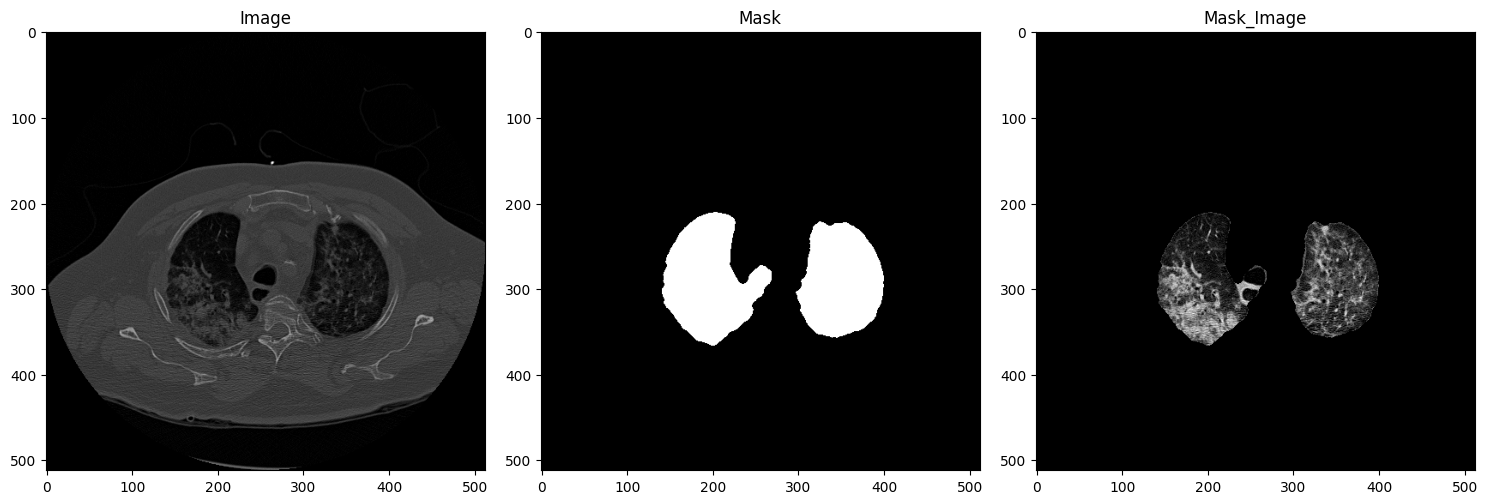

In [106]:
random_label = random.choice(labels)
print(random_label)
random_dcm = random.choice(os.listdir(label_path + "/" + random_label))
print(random_dcm)
img_ , mask_, target_ = converter(random_dcm)

# print(img_ , mask_, target_)

dcm_paths = [label_path + random_label + "/" + img_ ,
             mask_path + mask_,
             target_path + random_label + "/"  + target_]
plot_dicom_subplots(dcm_paths)

In [112]:
def count_files_in_subfolders(folder):
    subfolder_counts = {}
    for root, dirs, files in os.walk(folder):
        subfolder_name = os.path.relpath(root, folder)
        subfolder_counts[subfolder_name] = len(files)
    return subfolder_counts

print("Images Folder")
subfolder_counts = count_files_in_subfolders(label_path)
for subfolder, count in subfolder_counts.items():
    print(f"Number of files in {subfolder}: {count}")
print("\n\nMask + Images Folder")
subfolder_counts = count_files_in_subfolders(target_path)
for subfolder, count in subfolder_counts.items():
    print(f"Number of files in {subfolder}: {count}")


Images Folder
Number of files in .: 0
Number of files in ground_glass: 390
Number of files in fibrosis: 386
Number of files in micronodules: 274
Number of files in consolidation: 183
Number of files in healthy: 100
Number of files in emphysema: 66
Number of files in reticulation: 89


Mask + Images Folder
Number of files in .: 0
Number of files in ground_glass: 390
Number of files in fibrosis: 386
Number of files in micronodules: 274
Number of files in consolidation: 183
Number of files in healthy: 100
Number of files in emphysema: 66
Number of files in reticulation: 89
